In [207]:
%reset -f 

In [208]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [209]:
p = pd.read_csv("clickbait_titles.csv",index_col=0, parse_dates=['timestamp'])
n = pd.read_csv("non_clickbait_titles.csv",index_col=0, parse_dates=['timestamp'])
p['y'] = 1
n['y'] = 0

In [210]:
p.head()

,timestamp,title,url,y
0,2018-05-18 19:22:06,"20 imagens que, por incrível que pareça, não s...",https://www.buzzfeed.com/daves4/animais-penis-...,1
1,2018-05-16 17:24:04,24 filmes da Disney explicados por homens que ...,https://www.buzzfeed.com/keelyflaherty/filmes-...,1
2,2018-05-15 17:39:34,Todo mundo é uma princesa da Disney OU um heró...,https://www.buzzfeed.com/perpetua/teste-prince...,1
3,2018-05-10 19:57:22,Quais são as três comidas que combinam com a s...,https://www.buzzfeed.com/joannaborns/teste-tre...,1
4,2018-04-27 21:17:34,Este teste sobre comida vai dizer de uma vez p...,https://www.buzzfeed.com/joannaborns/teste-com...,1


In [211]:
n.head()

,timestamp,title,url,y
0,2018-05-22 21:02:43,Nem todos que assinam manifesto pró-Boulos dec...,https://www.buzzfeed.com/tatianafarah/frei-bet...,0
1,2018-05-22 18:47:46,Centenas de professores universitários não est...,https://www.buzzfeed.com/felitti/centenas-de-p...,0
2,2018-05-22 14:35:14,Janaina Paschoal diz que ser vice de Bolsonaro...,https://www.buzzfeed.com/tatianafarah/janaina-...,0
3,2018-05-21 20:58:21,Russomanno vira sócio de startup financeira qu...,https://www.buzzfeed.com/alexandrearagao/russo...,0
4,2018-05-21 20:21:21,"Governo errou na política para combustíveis, d...",https://www.buzzfeed.com/severinomotta/governo...,0


In [212]:
data = pd.concat( [p, n], ignore_index=True).sort_values('timestamp')

In [213]:
data.head()

,timestamp,title,url,y
801,2013-08-29 14:48:00,24 Coisas Que As Pessoas Solteiras Estão Cansa...,https://www.buzzfeed.com/ashleyperez/24-coisas...,1
800,2013-08-30 15:10:58,27 Decisões Do Dia-a-dia Que Pessoas De Vinte-...,https://www.buzzfeed.com/regajha/27-decisoes-d...,1
799,2013-09-04 12:07:03,21 Fotos Provando Que Os Irmãos Mais Velhos Tê...,https://www.buzzfeed.com/moerder/21-fotos-prov...,1
798,2013-09-04 16:06:57,30 Sinais De Que Você Tem Quase 30,https://www.buzzfeed.com/jessicamisener/30-sin...,1
1306,2013-10-18 03:29:53,38 Sinais Que Você é Um Basset Hound,https://www.buzzfeed.com/chelseamarshall/38-si...,1


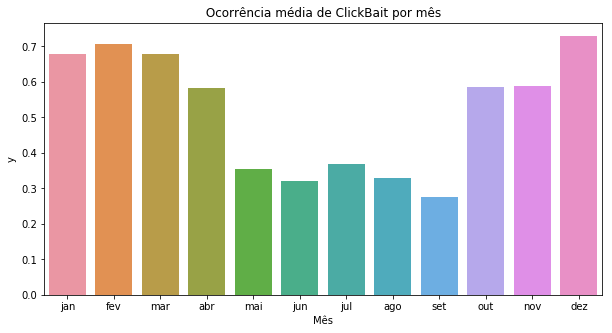

In [214]:
month = data.groupby(data['timestamp'].dt.month)['y'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot( month.timestamp, month.y )
plt.xlabel("Mês")
plt.xticks( [x for x in range(12)], ["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"])

plt.title(" Ocorrência média de ClickBait por mês ")
plt.show()

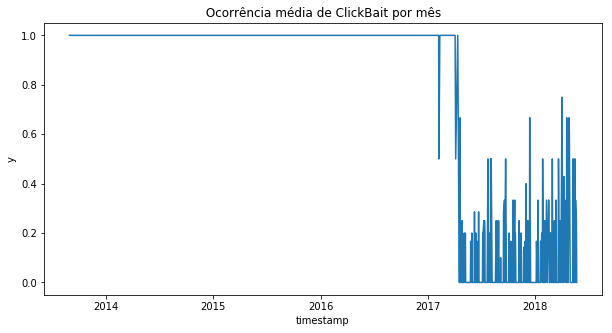

In [215]:
dataplot = data.groupby(data['timestamp'].dt.date)['y'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot( dataplot.timestamp, dataplot.y )
plt.title(" Ocorrência média de ClickBait por mês ")
plt.show()

# Utilizando apenas dados a partir de 2017

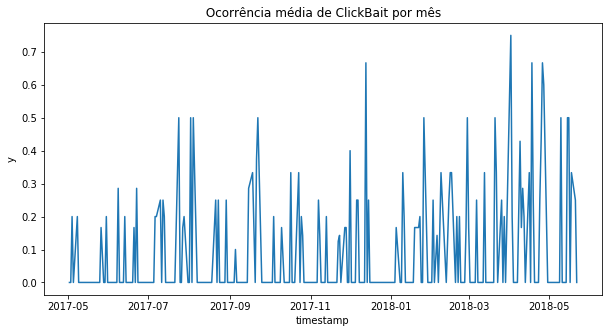

In [216]:
#data2 = data.groupby(data['timestamp'].dt.date)['y'].mean().reset_index()

data2 = data.loc[data.timestamp > '2017-05-01'].copy()


dataplot = data2.groupby(data2['timestamp'].dt.date)['y'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot( dataplot.timestamp, dataplot.y )
plt.title(" Ocorrência média de ClickBait por mês ")
plt.show()


In [217]:
data2.shape

(1128, 4)

In [218]:
data2['title_pre'] = 0

In [219]:
data2['title_pre'] = data2['title'].str.lower().str.replace(r'[^\w\s]+',' ')


In [220]:
data2['title_pre'].head()

2315    em pesquisa encomendada pela presidência  82  ...
2314    o que você precisa saber sobre o projeto de le...
2313    stf manda soltar josé dirceu e impõe nova derr...
2312    deltan diz que soltar dirceu foi uma decisão i...
2311    moro determina que josé dirceu use tornozeleir...
Name: title_pre, dtype: object

In [221]:
data2.head()

,timestamp,title,url,y,title_pre
2315,2017-05-02 13:55:49,"Em pesquisa encomendada pela Presidência, 82% ...",https://www.buzzfeed.com/filipecoutinho/pesqui...,0,em pesquisa encomendada pela presidência 82 ...
2314,2017-05-02 18:54:58,O que você precisa saber sobre o projeto de le...,https://www.buzzfeed.com/tatianafarah/o-que-vo...,0,o que você precisa saber sobre o projeto de le...
2313,2017-05-02 21:20:43,STF manda soltar José Dirceu e impõe nova derr...,https://www.buzzfeed.com/severinomotta/stf-hab...,0,stf manda soltar josé dirceu e impõe nova derr...
2312,2017-05-02 23:46:07,Deltan diz que soltar Dirceu foi uma decisão i...,https://www.buzzfeed.com/severinomotta/deltan-...,0,deltan diz que soltar dirceu foi uma decisão i...
2311,2017-05-03 15:39:30,Moro determina que José Dirceu use tornozeleir...,https://www.buzzfeed.com/filipecoutinho/moro-d...,0,moro determina que josé dirceu use tornozeleir...


In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split

In [223]:
x = data2['title_pre'].copy()
y = data2['y'].copy()
x.shape,y.shape

((1128,), (1128,))

In [224]:
x.head(5)

2315    em pesquisa encomendada pela presidência  82  ...
2314    o que você precisa saber sobre o projeto de le...
2313    stf manda soltar josé dirceu e impõe nova derr...
2312    deltan diz que soltar dirceu foi uma decisão i...
2311    moro determina que josé dirceu use tornozeleir...
Name: title_pre, dtype: object

In [225]:
y.head(5)

2315    0
2314    0
2313    0
2312    0
2311    0
Name: y, dtype: int64

In [227]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.3)

# Baseline

In [230]:
base = np.ones(xtest.shape[0]) *ytrain.mean()
base.mean()

0.10646387832699619

In [231]:
log_loss(ytest, base)

0.33220962463807

#Bag of words
#linhas = documentos x  columna=palavras

ngram_range: quantas palavras são utilizadas em conjunto...
ngram_range=(1,1) -- utiliza apena 1 palavra por coluna.
ngram_range=(1,2) -- utiliza 1 e 2 palavras para criar a coluna. 
o aumento do ngrama por melhorar a performace do modelo. Mas nesse caso não melhorou então vamos ficar com 1,1 mesmo.


In [245]:
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state = 0)   )
mdl.fit(xtrain,ytrain)
p = mdl.predict_proba(xtest)[:,1]
log_loss(ytest,p)

0.1463984080535793

In [250]:
print("Numero de palavras no vocabulario",len( mdl.named_steps.tfidfvectorizer.vocabulary_ ) )

Numero de palavras no vocabulario 3100


In [253]:
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), LogisticRegression(C=20.)   )
mdl.fit(xtrain,ytrain)
p = mdl.predict_proba(xtest)[:,1]
log_loss(ytest,p)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.10111653971276334

In [254]:
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), LogisticRegression(C=20.)   )
mdl.fit(x,y)
p = mdl.predict_proba(xtest)[:,1]
log_loss(ytest,p)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0254638642136767

In [258]:
!pip install joblib

In [259]:
import joblib as jb
jb.dump(mdl,"mdl.pkl.z")

['mdl.pkl.z']

# API Resquest

In [262]:
import requests as r
import urllib.parse

